In [585]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from random import *

# Load Data Sets

In [586]:
cleaned_central_london = pd.read_csv('cleaned_central_london_done.csv')
central_london = cleaned_central_london.copy()
central_london.head(1)

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey_date,Survey_weekday,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0600 - 0615,Early Morning,Northbound,06:00,0,0,0


In [587]:
cleaned_inner_london =  pd.read_csv('cleaned_inner_london.csv')
inner_london = cleaned_inner_london.copy()
inner_london.head(1)

,Survey wave (year),Site ID,Location,Survey_weekday,Survey_date,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0600 - 0615,Early Morning,Northbound,06:00,1,0,1


In [588]:
inner_london['Weather'].unique()

array(['Dry', 'Wet', 'Unknown', 'Fine/Sunny', 'Windy', 'Mixed'],
      dtype=object)

In [589]:
cleaned_outer_london =  pd.read_csv('cleaned_outer_london.csv')
outer_london = cleaned_outer_london.copy()

outer_london.head(1)

,Survey wave (year),Site ID,Location,Weather,Time,Period,Direction,Start time,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,Dry,0600 - 0615,Early Morning,Northbound,06:00,2,1,0,3


# All London : Total Journeys Analysis

In [590]:
Total_central_london = central_london[['Site ID', 'Location','Weather','Time','Period', 'Direction', 'Start time','Total cycles']]
Total_central_london.head(1)

,Site ID,Location,Weather,Time,Period,Direction,Start time,Total cycles
0,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning,Northbound,06:00,0


In [591]:
Total_inner_london= inner_london[['Site ID', 'Location','Weather','Time','Period', 'Direction', 'Start time','Total cycles']]
Total_inner_london.head(1)

,Site ID,Location,Weather,Time,Period,Direction,Start time,Total cycles
0,INNCY001,Grove Road,Dry,0600 - 0615,Early Morning,Northbound,06:00,1


In [592]:
Total_outer_london= inner_london[['Site ID', 'Location','Weather','Time','Period', 'Direction', 'Start time','Total cycles']]
Total_outer_london.head(1)

,Site ID,Location,Weather,Time,Period,Direction,Start time,Total cycles
0,INNCY001,Grove Road,Dry,0600 - 0615,Early Morning,Northbound,06:00,1


In [593]:
all_london = pd.concat([Total_central_london, Total_inner_london, Total_outer_london], ignore_index=True)
all_london.head(3)

,Site ID,Location,Weather,Time,Period,Direction,Start time,Total cycles
0,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning,Northbound,06:00,0
1,CENCY001,Millbank (south of Thorney Street),Dry,0615 - 0630,Early Morning,Northbound,06:15,15
2,CENCY001,Millbank (south of Thorney Street),Dry,0630 - 0645,Early Morning,Northbound,06:30,35


In [594]:
all_london['Weather'].unique()

array(['Dry', 'Wet', 'Fine/Sunny', 'Cold', 'Mixed', 'Unknown', 'Windy'],
      dtype=object)

In [595]:
all_london['Weather'] = all_london['Weather'].replace('Fine/Sunny', 'Dry')

In [596]:
excluded_values = ['Cold', 'Mixed', 'Unknown', 'Windy']

filtered_all_london = all_london[~all_london['Weather'].isin(excluded_values)]

filtered_all_london.head(3)

,Site ID,Location,Weather,Time,Period,Direction,Start time,Total cycles
0,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning,Northbound,06:00,0
1,CENCY001,Millbank (south of Thorney Street),Dry,0615 - 0630,Early Morning,Northbound,06:15,15
2,CENCY001,Millbank (south of Thorney Street),Dry,0630 - 0645,Early Morning,Northbound,06:30,35


### Hypothesis: More journeys are completed by bike in the summer months than in the winter months

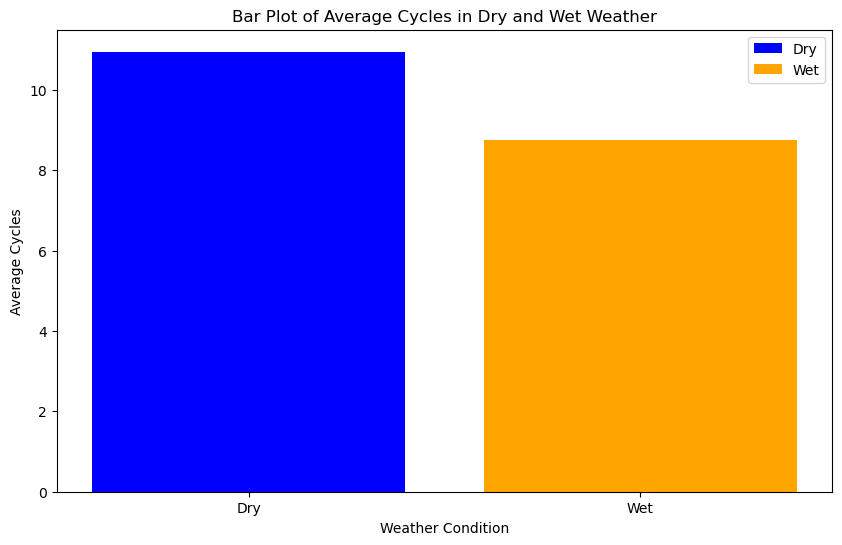

In [597]:
plt.figure(figsize=(10, 6))

# Filter weather conditions
all_dry_data = filtered_all_london[filtered_all_london['Weather'] == 'Dry']
all_wet_data = filtered_all_london[filtered_all_london['Weather'] == 'Wet']

# Plot bar plots
plt.bar('Dry', all_dry_data['Total cycles'].agg('mean'), color='blue', label='Dry')
plt.bar('Wet', all_wet_data['Total cycles'].agg('mean'), color='orange', label='Wet')

plt.title('Bar Plot of Average Cycles in Dry and Wet Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Average Cycles')
plt.legend()

plt.show()


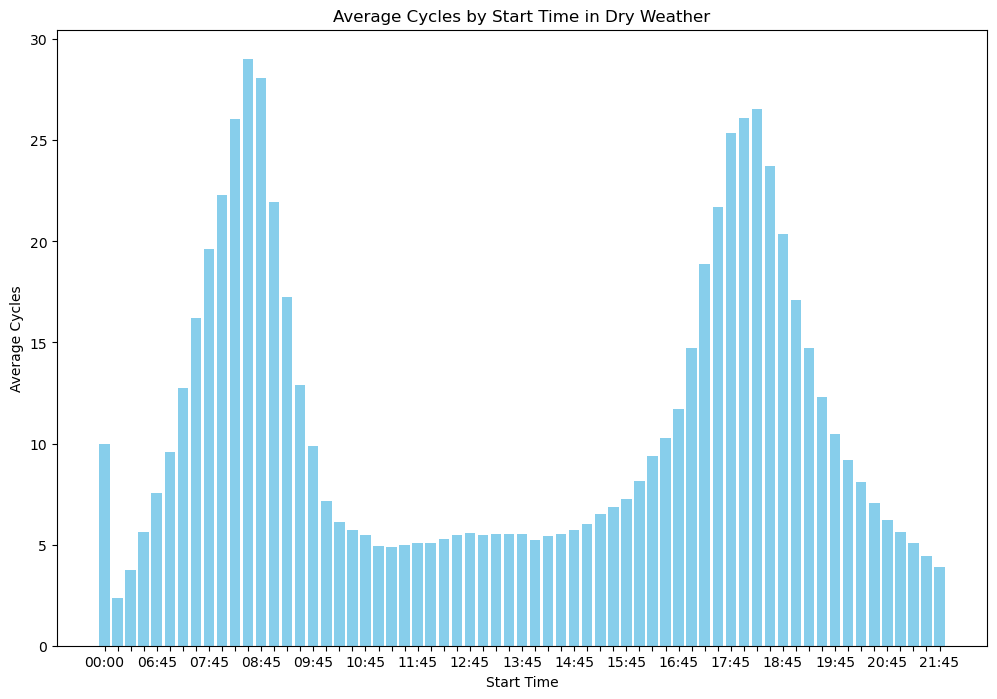

In [598]:
import matplotlib.pyplot as plt

average_cycles_start_time = all_dry_data.groupby('Start time')['Total cycles'].mean().reset_index()

# Bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(average_cycles_start_time['Start time'], average_cycles_start_time['Total cycles'], color='skyblue')

# Set x-axis ticks at every 5th label
every_nth = 4
for i, label in enumerate(plt.xticks()[1]):
    if i % every_nth != 0:
        label.set_visible(False)

plt.title('Average Cycles by Start Time in Dry Weather')
plt.xlabel('Start Time')
plt.ylabel('Average Cycles')
plt.show()


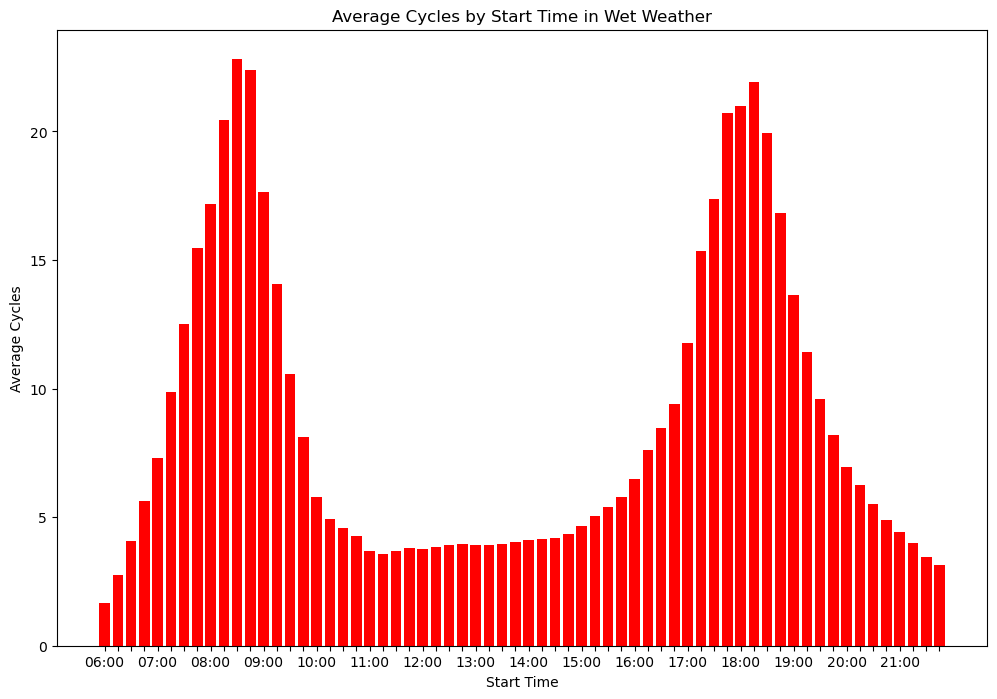

In [599]:
# Calculate the average cycles for each start time
average_cycles_start_time = all_wet_data.groupby('Start time')['Total cycles'].mean().reset_index()

# Bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(average_cycles_start_time['Start time'], average_cycles_start_time['Total cycles'], color='red')

# Set x-axis ticks at every 5th label
every_nth = 4
for i, label in enumerate(plt.xticks()[1]):
    if i % every_nth != 0:
        label.set_visible(False)

plt.title('Average Cycles by Start Time in Wet Weather')
plt.xlabel('Start Time')
plt.ylabel('Average Cycles')
plt.show()


##  1. Hypothesis: More journeys are completed by bike in the summer months than in the winter months

# Central London Analysis

In [600]:
central_london.head(1)

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey_date,Survey_weekday,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0600 - 0615,Early Morning,Northbound,06:00,0,0,0


### Prepare data

In [601]:
central_london = central_london[central_london['Survey_date'] != 'Unknown']

In [602]:
central_london['Weather'].unique()

array(['Dry', 'Wet', 'Fine/Sunny', 'Cold', 'Mixed', 'Unknown'],
      dtype=object)

In [603]:
central_london['Weather'] = central_london['Weather'].replace('Fine/Sunny', 'Dry')

## Format Seasons

In [604]:
central_london['Survey_date'] = pd.to_datetime(central_london['Survey_date'], format='%d/%m/%y')

In [605]:
#Function demarcate seasons
def weather_sampling(data, start_date, end_date):
    filtered_data = data[
        (data['Survey_date'].dt.strftime('%m-%d') >= start_date) &
        (data['Survey_date'].dt.strftime('%m-%d') <= end_date)
    ]
    return filtered_data

In [606]:
# Diffrent Seasons

spring= weather_sampling(central_london,'03-01','05-31')
spring['season'] = 'spring'

summer= weather_sampling(central_london,'06-01','08-31')
summer['season'] = 'summer'

autumn= weather_sampling(central_london,'09-01','11-30')
autumn['season'] = 'autumn'

/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_91414/1272805095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring['season'] = 'spring'
/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_91414/1272805095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer['season'] = 'summer'
/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_91414/1272805095.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [607]:
start_date_1 = '12-01'
end_date_1 = '12-31'
start_date_2 = '01-01'
end_date_2 = '02-29'

# Filter for the winter season for both years
winter_year1 = central_london[
    (
        (central_london['Survey_date'].dt.strftime('%m-%d') >= start_date_1) &
        (central_london['Survey_date'].dt.strftime('%m-%d') <= end_date_1)
    )
]

winter_year2 = central_london[
    (
        (central_london['Survey_date'].dt.strftime('%m-%d') >= start_date_2) &
        (central_london['Survey_date'].dt.strftime('%m-%d') <= end_date_2)
    )
]

# Concatenate data for both years to get the complete winter season data
winter = pd.concat([winter_year1, winter_year2])
winter['season'] = 'winter'

In [608]:
central_london = pd.concat([spring, summer, autumn, winter], ignore_index=True)
central_london.head(1)

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey_date,Survey_weekday,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles,season
0,2014 Q1 (January-March),2013-14 Q4,CENCY010,Lambeth Palace Road,2014-03-24,Monday,Dry,0600 - 0615,Early Morning,Northbound,06:00,2,0,2,spring


## Plot

In [609]:
total_cycles_spring = central_london[central_london['season'] == 'spring']['Total cycles'].sum()
total_cycles_summer = central_london[central_london['season'] == 'summer']['Total cycles'].sum()
total_cycles_autumn = central_london[central_london['season'] == 'autumn']['Total cycles'].sum()
total_cycles_winter = central_london[central_london['season'] == 'winter']['Total cycles'].sum()

In [610]:
# Calculate average cycles for each season
average_cycles_spring = central_london[central_london['season'] == 'spring']['Total cycles'].mean()
average_cycles_summer = central_london[central_london['season'] == 'summer']['Total cycles'].mean()
average_cycles_autumn = central_london[central_london['season'] == 'autumn']['Total cycles'].mean()
average_cycles_winter = central_london[central_london['season'] == 'winter']['Total cycles'].mean()


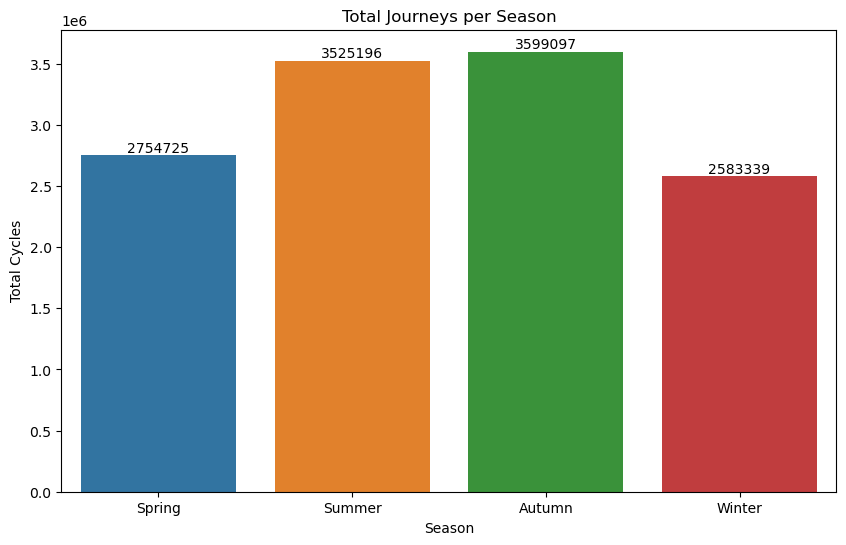

In [611]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=['Spring', 'Summer', 'Autumn', 'Winter'], y=[total_cycles_spring, total_cycles_summer, total_cycles_autumn, total_cycles_winter])

# Annotate each bar with its actual value
for bar, value in zip(bars.patches, [total_cycles_spring, total_cycles_summer, total_cycles_autumn, total_cycles_winter]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.0f}', ha='center', va='bottom')

# Customize the plot
plt.title('Total Journeys per Season')
plt.xlabel('Season')
plt.ylabel('Total Cycles')

# Show the plot
plt.show()

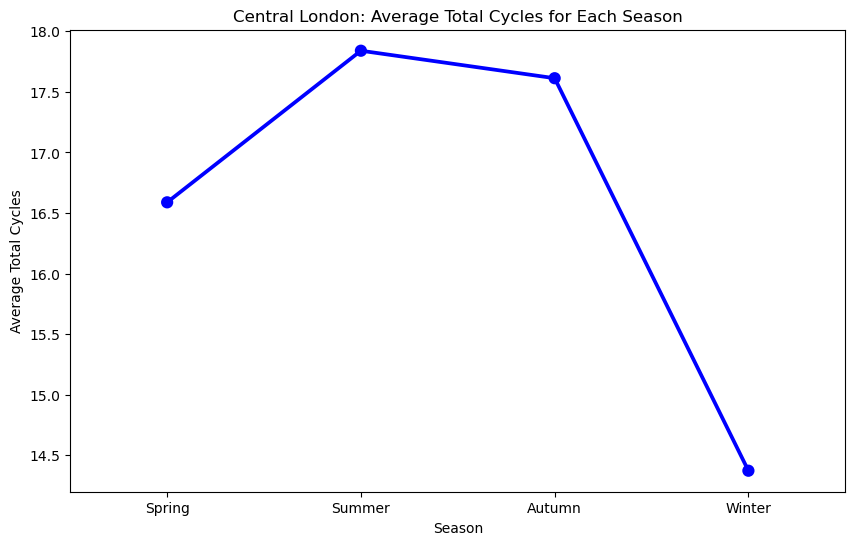

In [612]:
# Create a point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x=['Spring', 'Summer', 'Autumn', 'Winter'], y=[average_cycles_spring, average_cycles_summer, average_cycles_autumn, average_cycles_winter], color='blue', markers='o')

# Customize the plot
plt.title('Central London: Average Total Cycles for Each Season')
plt.xlabel('Season')
plt.ylabel('Average Total Cycles')

# Show the plot
plt.show()

## Yearly variations by season.

In [613]:
central_london['Year'] = central_london['Survey_date'].dt.year

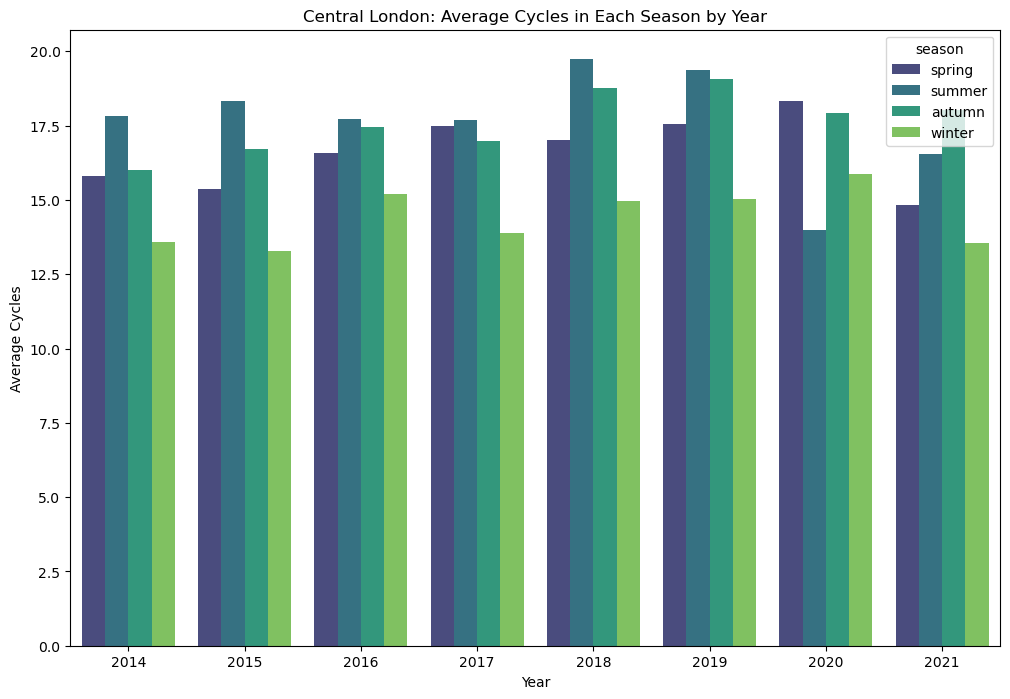

In [614]:
central_london_average_cycles = central_london.groupby(['Year', 'season'])['Total cycles'].mean().reset_index()

# DataFrame by year and season order
central_london_season_order = ['spring', 'summer', 'autumn', 'winter']
central_london_average_cycles['season'] = pd.Categorical(central_london_average_cycles['season'], categories=central_london_season_order, ordered=True)
central_london_average_cycles = central_london_average_cycles.sort_values(['Year', 'season'])

# Bar chart for average cycles in each season by year
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Total cycles', hue='season', data=central_london_average_cycles, palette='viridis')

plt.title('Central London: Average Cycles in Each Season by Year')
plt.xlabel('Year')
plt.ylabel('Average Cycles')
plt.show()

In [615]:
# Group by seasons
central_london_seasonal_averages = central_london.groupby('season').agg({
    'Number of cycle hire bikes': 'mean',
    'Number of private cycles': 'mean'
}).reindex(central_london_season_order).reset_index()

# Separate lists for cycle_hire and private_hire
central_london_av_cycle_hire_average = central_london_seasonal_averages['Number of cycle hire bikes'].tolist()
central_london_av_private_hire_average = central_london_seasonal_averages['Number of private cycles'].tolist()

# Now you have separate lists for cycle_hire_average and private_hire_average
print('Cycle Hire Average List:', central_london_av_cycle_hire_average)
print('Private Hire Average List:', central_london_av_private_hire_average)

Cycle Hire Average List: [1.7556062722805665, 2.094905544844059, 1.9186730479378316, 1.5062704471101418]
Private Hire Average List: [14.832727141343097, 15.744523220331264, 15.693914303051656, 12.867013108405848]


In [616]:
# order of seasons
season_order = ['winter','autumn','summer', 'spring']

In [617]:
central_london_data = {'Season': [], 'Type of Hire': [], 'Count': []}

unique_season_conditions = ['spring', 'summer', 'autumn', 'winter']

#For loop for each condition
for season_condition in unique_season_conditions:
    #Central_london | Section type hire | Count
    central_london_total_cycle_hire = central_london[central_london['season'] == season_condition]['Number of cycle hire bikes'].sum()
    central_london_total_private_cycle = central_london[central_london['season'] == season_condition]['Number of private cycles'].sum()
    
    central_london_data['Season'].extend([season_condition, season_condition])
    central_london_data['Type of Hire'].extend(['Cycle Hire', 'Private Hire'])
    central_london_data['Count'].extend([central_london_total_cycle_hire, central_london_total_private_cycle])

central_london_hire_df = pd.DataFrame(central_london_data)
central_london_hire_df.head(2)


,Season,Type of Hire,Count
0,spring,Cycle Hire,291543
1,spring,Private Hire,2463182


<Figure size 1000x600 with 0 Axes>

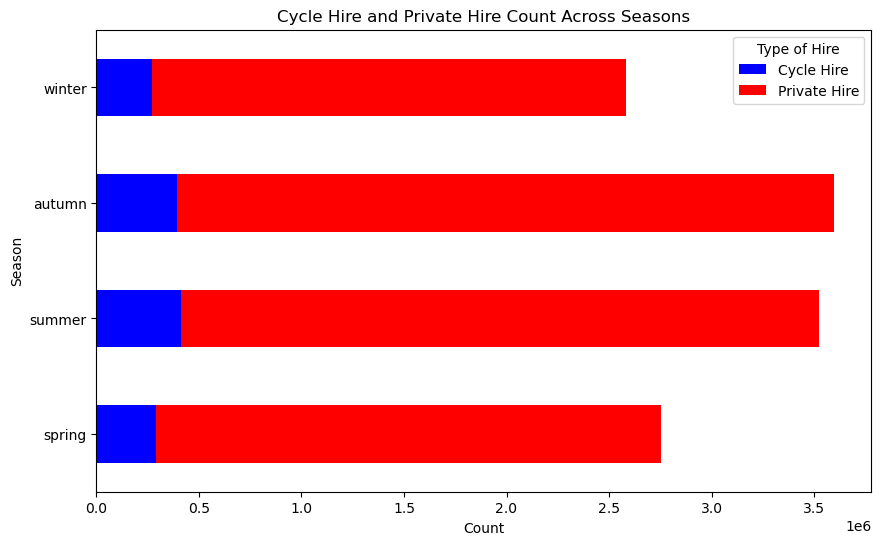

In [618]:
plt.figure(figsize=(10, 6))

# Pivot the DataFrame to create separate columns for each type of hire
central_london_hire_df_pivot = central_london_hire_df.pivot(index='Season', columns='Type of Hire', values='Count')

# Plot the horizontal stacked bar chart with explicit order
central_london_hire_df_pivot.loc[central_london_season_order].plot(kind='barh', stacked=True, colormap='bwr', figsize=(10, 6))

plt.title('Cycle Hire and Private Hire Count Across Seasons')
plt.xlabel('Count')
plt.ylabel('Season')
plt.show()

In [619]:
#List of Types

central_london_cycle_hire_average_list = [1.7556062722805665, 2.094905544844059, 1.9186730479378316, 1.5062704471101418]
central_london_private_hire_average_list= [14.832727141343097, 15.744523220331264, 15.693914303051656, 12.867013108405848]

In [620]:
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

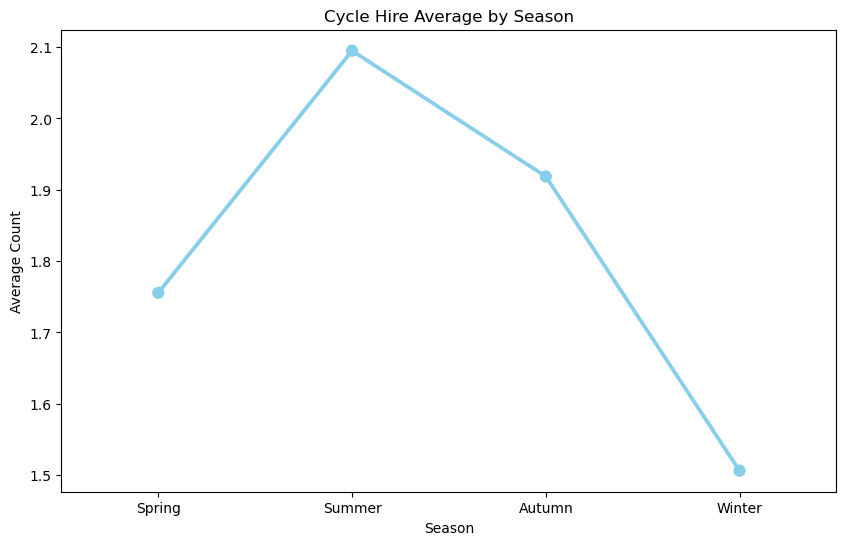

In [621]:
central_london_cycle_hire_data = {'Season': season_order, 'Cycle Hire Average': central_london_cycle_hire_average_list}
central_london_cycle_hire_data_df = pd.DataFrame(central_london_cycle_hire_data)

plt.figure(figsize=(10, 6))
sns.pointplot(x='Season', y='Cycle Hire Average', data=central_london_cycle_hire_data_df, order=season_order, color='skyblue')

# Customize plot
plt.title('Cycle Hire Average by Season')
plt.xlabel('Season')
plt.ylabel('Average Count')
plt.show()

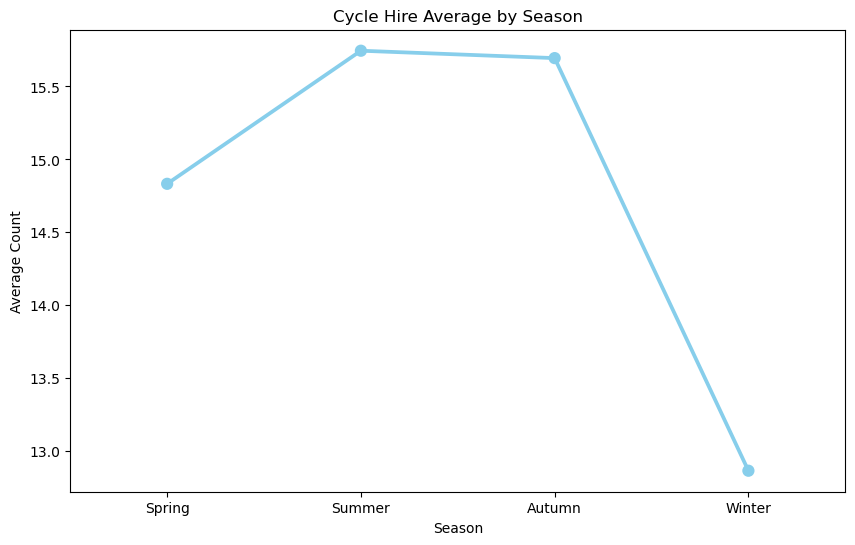

In [622]:
central_london_private_hire_data = {'Season': season_order, 'Cycle Hire Average': central_london_private_hire_average_list}
central_london_private_hire_df = pd.DataFrame(central_london_private_hire_data)

# Point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Season', y='Cycle Hire Average', data=central_london_private_hire_df, order=season_order, color='skyblue')

# Customize  plot
plt.title('Cycle Hire Average by Season')
plt.xlabel('Season')
plt.ylabel('Average Count')
plt.show()


# Inner London Analysis

In [623]:
inner_london.head(1)

,Survey wave (year),Site ID,Location,Survey_weekday,Survey_date,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0600 - 0615,Early Morning,Northbound,06:00,1,0,1


### Prepare data

In [624]:
inner_london = inner_london[inner_london['Survey_date'] != 'Unknown']

In [625]:
inner_london['Weather'].unique()

array(['Dry', 'Wet', 'Unknown', 'Fine/Sunny', 'Windy', 'Mixed'],
      dtype=object)

In [626]:
inner_london['Weather'] = inner_london['Weather'].replace('Fine/Sunny', 'Dry')

## Format 

In [627]:
#Datetime
inner_london['Survey_date'] = pd.to_datetime(inner_london['Survey_date'], format='%d/%m/%y')

In [628]:
#utilising Function: Demarcate the diffrent weathers
inn_spring= weather_sampling(inner_london,'03-01','05-31')
inn_spring['season'] = 'spring'

inn_summer= weather_sampling(inner_london,'06-01','08-31')
inn_summer['season'] = 'summer'

inn_autumn= weather_sampling(inner_london,'09-01','11-30')
inn_autumn['season'] = 'autumn'

/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_91414/2222548189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inn_spring['season'] = 'spring'
/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_91414/2222548189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inn_summer['season'] = 'summer'
/var/folders/lt/08m9hqm92sj18xcqdl3v6h2c0000gn/T/ipykernel_91414/2222548189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [629]:
# Filter for the winter season for both years
inn_winter_year1 = inner_london[
    (
        (inner_london['Survey_date'].dt.strftime('%m-%d') >= start_date_1) &
        (inner_london['Survey_date'].dt.strftime('%m-%d') <= end_date_1)
    )
]

inn_winter_year2 = inner_london[
    (
        (inner_london['Survey_date'].dt.strftime('%m-%d') >= start_date_2) &
        (inner_london['Survey_date'].dt.strftime('%m-%d') <= end_date_2)
    )
]

# Concatenate data for both years to get the complete winter season data
inn_winter = pd.concat([inn_winter_year1, inn_winter_year2])
inn_winter['season'] = 'winter'

In [630]:
inner_london = pd.concat([inn_spring, inn_summer, inn_autumn, inn_winter], ignore_index=True)
inner_london.head(1)

,Survey wave (year),Site ID,Location,Survey_weekday,Survey_date,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles,season
0,2015,INNCY001,Grove Road,Wednesday,2015-05-20,Dry,0600 - 0615,Early Morning,Northbound,06:00,1,0,1,spring


In [631]:
inner_london['season'].value_counts()

summer    239572
spring    230508
autumn     50944
Name: season, dtype: int64

In [632]:
inner_london['season'].unique()

array(['spring', 'summer', 'autumn'], dtype=object)

# Plot

In [633]:
#Sum of each season: Inner london
total_cycles_inner_spring = inner_london[inner_london['season'] == 'spring']['Total cycles'].sum()
total_cycles_inner_summer = inner_london[inner_london['season'] == 'summer']['Total cycles'].sum()
total_cycles_inner_autumn = inner_london[inner_london['season'] == 'autumn']['Total cycles'].sum()
total_cycles_inner_winter = inner_london[inner_london['season'] == 'winter']['Total cycles'].sum()


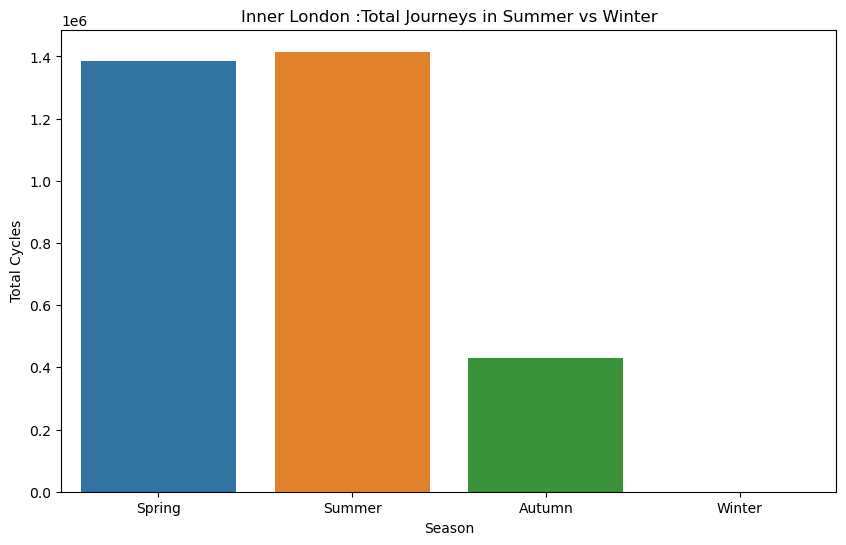

In [634]:
#Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=['Spring','Summer','Autumn','Winter'], y=[total_cycles_inner_spring, total_cycles_inner_summer,total_cycles_inner_autumn, total_cycles_inner_winter])

# Customize plot
plt.title('Inner London :Total Journeys in Summer vs Winter')
plt.xlabel('Season')
plt.ylabel('Total Cycles')
plt.show()

In [635]:
#Average for each season
average_cycles_inner_spring = inner_london[inner_london['season'] == 'spring']['Total cycles'].agg('mean')
average_cycles_inner_summer = inner_london[inner_london['season'] == 'summer']['Total cycles'].agg('mean')
average_cycles_inner_autumn = inner_london[inner_london['season'] == 'autumn']['Total cycles'].agg('mean')


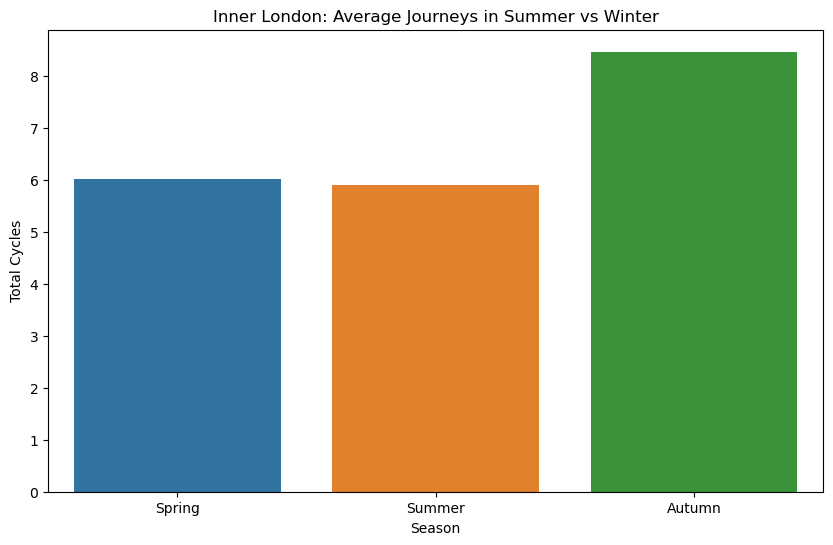

In [636]:
#Bar plot: Average journey in Inner london

plt.figure(figsize=(10, 6))
sns.barplot(x=['Spring','Summer','Autumn'], y=[average_cycles_inner_spring, average_cycles_inner_summer,average_cycles_inner_autumn])

plt.title('Inner London: Average Journeys in Summer vs Winter')
plt.xlabel('Season')
plt.ylabel('Total Cycles')
plt.show()

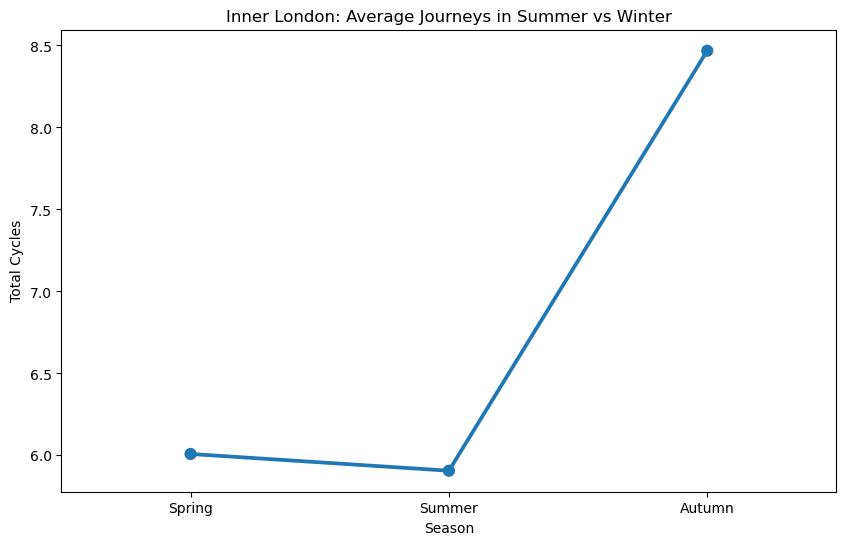

In [637]:
#Pointplot
plt.figure(figsize=(10, 6))
sns.pointplot(x=['Spring','Summer','Autumn'], y=[average_cycles_inner_spring, average_cycles_inner_summer,average_cycles_inner_autumn])

plt.title('Inner London: Average Journeys in Summer vs Winter')
plt.xlabel('Season')
plt.ylabel('Total Cycles')
plt.show()

In [638]:
inner_london.head(1)

,Survey wave (year),Site ID,Location,Survey_weekday,Survey_date,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles,season
0,2015,INNCY001,Grove Road,Wednesday,2015-05-20,Dry,0600 - 0615,Early Morning,Northbound,06:00,1,0,1,spring


In [639]:
inner_london['Year'] = inner_london['Survey_date'].dt.year

In [640]:
inner_london.head(1)

,Survey wave (year),Site ID,Location,Survey_weekday,Survey_date,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles,season,Year
0,2015,INNCY001,Grove Road,Wednesday,2015-05-20,Dry,0600 - 0615,Early Morning,Northbound,06:00,1,0,1,spring,2015


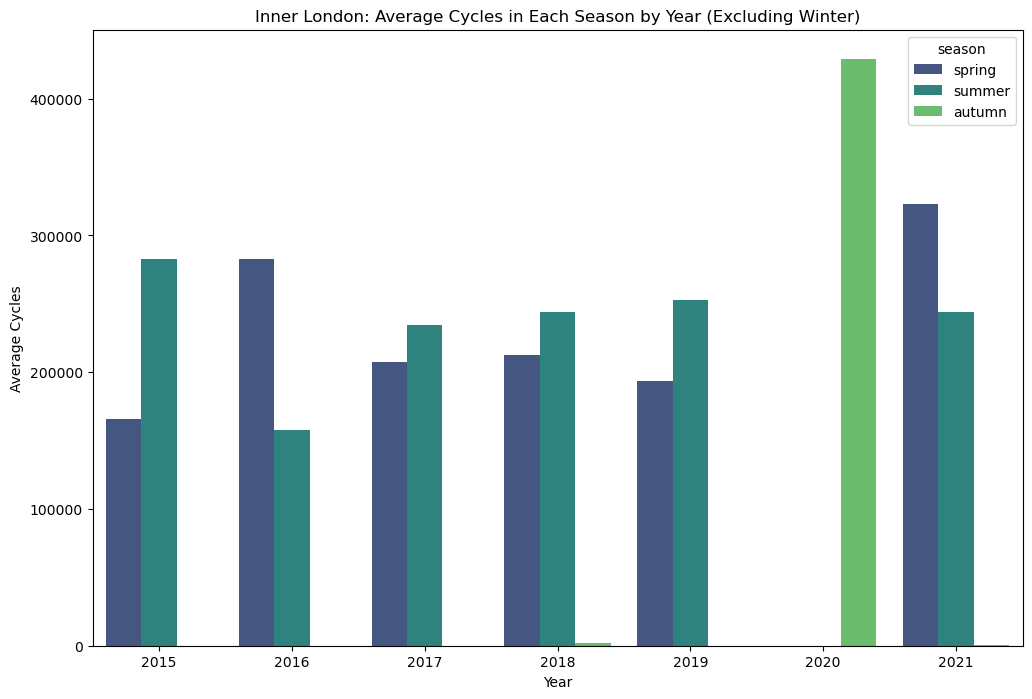

In [641]:
# Filter out the 'winter'
total_inner_cycles = inner_london[inner_london['season'] != 'winter']

# Group by year and season
total_inner_cycles = total_inner_cycles.groupby(['Year', 'season'])['Total cycles'].sum().reset_index()

# Sort by year and season order
inn_season_order = ['spring', 'summer', 'autumn']
total_inner_cycles['season'] = pd.Categorical(total_inner_cycles['season'], categories=inn_season_order, ordered=True)
total_inner_cycles = total_inner_cycles.sort_values(['Year', 'season'])

# Create a bar chart: average cycles in each season by year
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Total cycles', hue='season', data=total_inner_cycles, palette='viridis')
plt.title('Inner London: Average Cycles in Each Season by Year (Excluding Winter)')
plt.xlabel('Year')
plt.ylabel('Average Cycles')
plt.show()


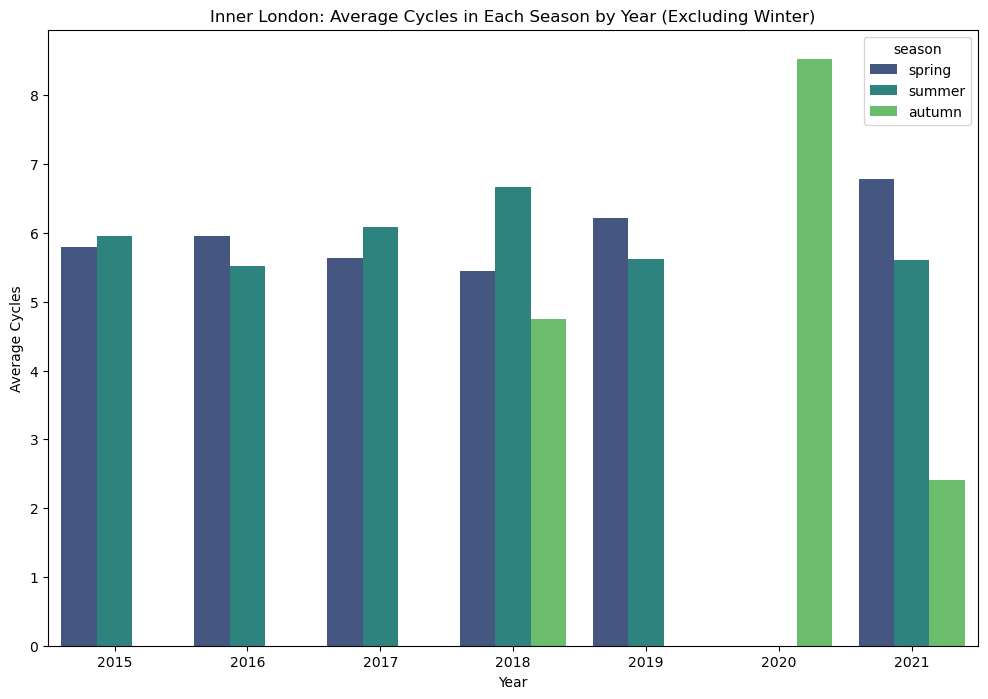

In [642]:
# excluding 'winter' using !=
average_inner_cycles = inner_london[inner_london['season'] != 'winter']

# Group by year and season 
average_inner_cycles = average_inner_cycles.groupby(['Year', 'season'])['Total cycles'].mean().reset_index()

# Sort the DataFrame by year and season order
average_inner_cycles['season'] = pd.Categorical(average_inner_cycles['season'], categories=inn_season_order, ordered=True)
average_inner_cycles = average_inner_cycles.sort_values(['Year', 'season'])

# Create a bar chart: average cycles in each season by year
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Total cycles', hue='season', data=average_inner_cycles, palette='viridis')
plt.title('Inner London: Average Cycles in Each Season by Year (Excluding Winter)')
plt.xlabel('Year')
plt.ylabel('Average Cycles')
plt.show()


# 2. Hypothesis: More journeys are completed by bike in dry weather than rain

# Central London Analysis

In [643]:
central_london.head(1)

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey_date,Survey_weekday,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles,season,Year
0,2014 Q1 (January-March),2013-14 Q4,CENCY010,Lambeth Palace Road,2014-03-24,Monday,Dry,0600 - 0615,Early Morning,Northbound,06:00,2,0,2,spring,2014


### Prepare data

In [644]:
weather_conditions = ['Dry', 'Wet']
filtered_weather = central_london[central_london['Weather'].isin(weather_conditions)]
filtered_weather.head(1)

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey_date,Survey_weekday,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles,season,Year
0,2014 Q1 (January-March),2013-14 Q4,CENCY010,Lambeth Palace Road,2014-03-24,Monday,Dry,0600 - 0615,Early Morning,Northbound,06:00,2,0,2,spring,2014


In [645]:
central_dry_data = central_london[central_london['Weather'] == 'Dry']
central_wet_data = central_london[central_london['Weather'] == 'Wet']

# Plot

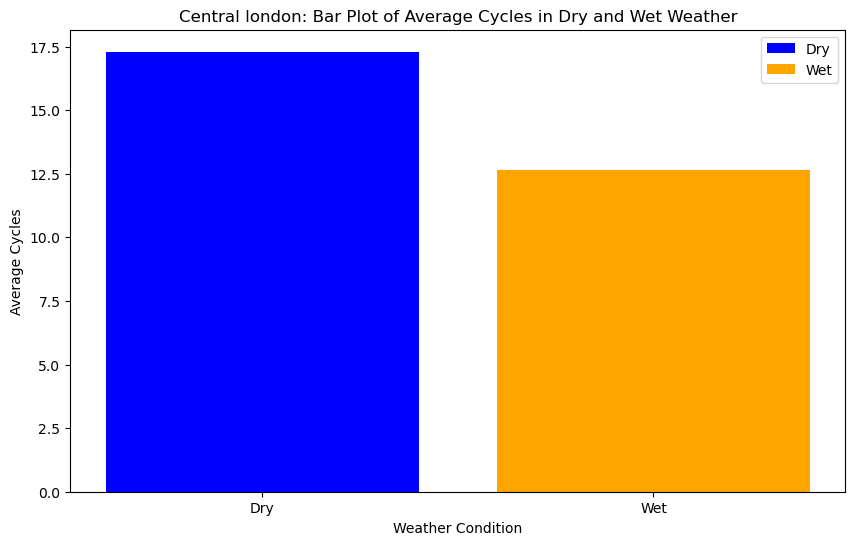

In [646]:
plt.figure(figsize=(10, 6))

plt.bar('Dry', central_dry_data['Total cycles'].agg('mean'), color='blue', label='Dry')
plt.bar('Wet', central_wet_data['Total cycles'].agg('mean'), color='orange', label='Wet')

# Customize plot
plt.title('Central london: Bar Plot of Average Cycles in Dry and Wet Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Average Cycles')
plt.legend()
plt.show()

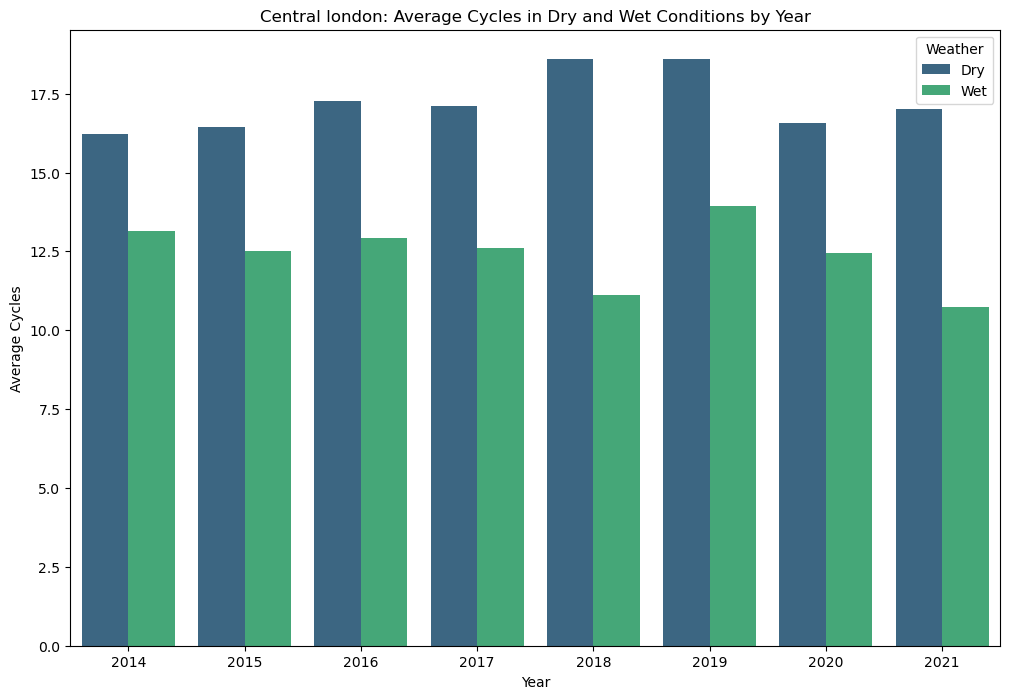

In [647]:
# Calculate the average cycles for each weather condition by year
average_cycles_weather = central_london.groupby(['Year', 'Weather'])['Total cycles'].mean().reset_index()

# Sort the DataFrame by year and weather condition

weather_order = ['Dry', 'Wet'] 
average_cycles_weather['Weather'] = pd.Categorical(average_cycles_weather['Weather'], categories=weather_order, ordered=True)
average_cycles_weather = average_cycles_weather.sort_values(['Year', 'Weather'])

# Create a bar chart for average cycles in each weather condition by year
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Total cycles', hue='Weather', data=average_cycles_weather, palette='viridis')
plt.title('Central london: Average Cycles in Dry and Wet Conditions by Year')
plt.xlabel('Year')
plt.ylabel('Average Cycles')
plt.show()

In [648]:
import calendar

central_london['Month'] = central_london['Survey_date'].dt.month
central_london['Month'] = central_london['Month'].apply(lambda x: calendar.month_name[x])



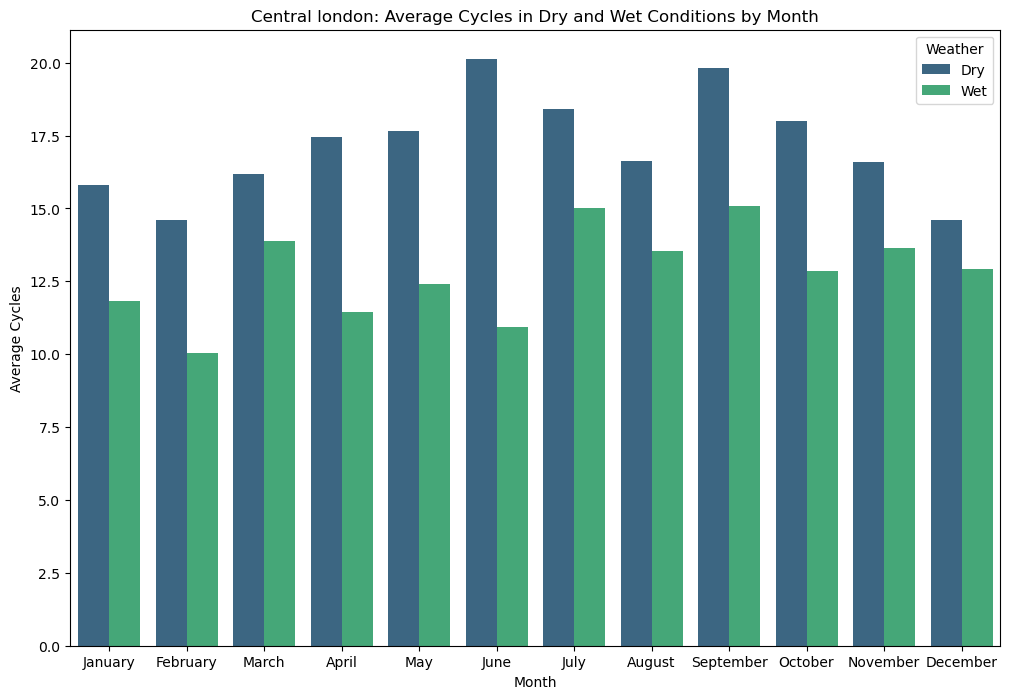

In [649]:
# Calculate the average cycles for each weather condition by year
average_cycles_weather = central_london.groupby(['Month', 'Weather'])['Total cycles'].mean().reset_index()

# Convert 'Month' to a categorical type with specified order
month_order = list(calendar.month_name)[1:]
average_cycles_weather['Month'] = pd.Categorical(average_cycles_weather['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by month and weather condition
average_cycles_weather['Weather'] = pd.Categorical(average_cycles_weather['Weather'], categories=weather_order, ordered=True)
average_cycles_weather = average_cycles_weather.sort_values(['Month', 'Weather'])

# Bar chart for average cycles in each weather condition by year
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Total cycles', hue='Weather', data=average_cycles_weather, palette='viridis')
plt.title('Central london: Average Cycles in Dry and Wet Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Average Cycles')
plt.show()


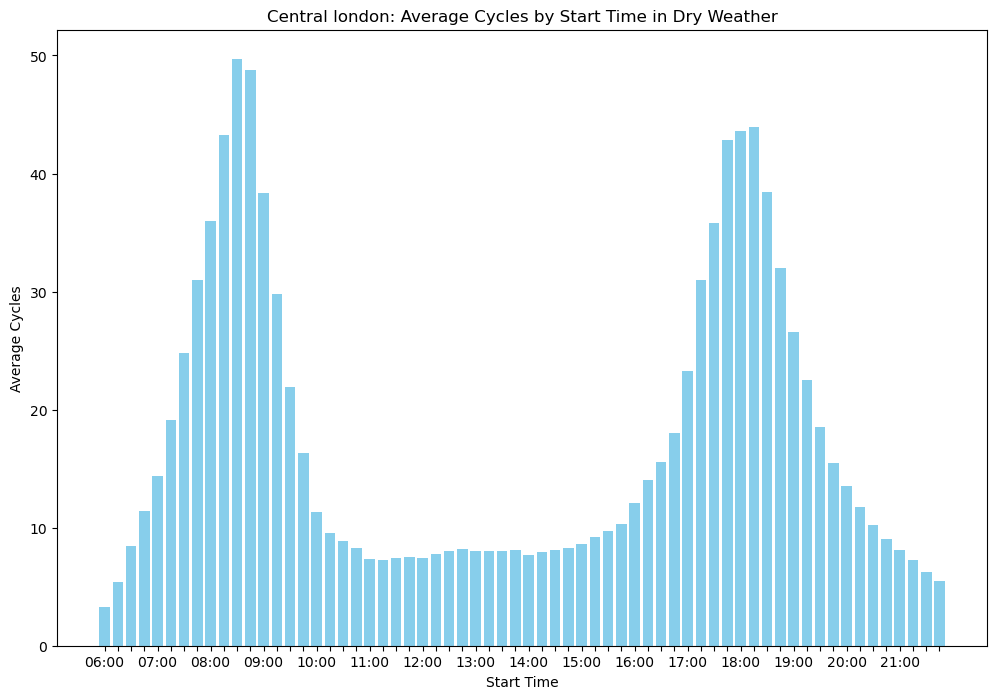

In [650]:
# Calculate the average cycles | Group by
average_cycles_start_time = central_dry_data.groupby('Start time')['Total cycles'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
bars = plt.bar(average_cycles_start_time['Start time'], average_cycles_start_time['Total cycles'], color='skyblue')

# Set x-axis ticks at every 5th label
every_nth = 4
for i, label in enumerate(plt.xticks()[1]):
    if i % every_nth != 0:
        label.set_visible(False)

plt.title('Central london: Average Cycles by Start Time in Dry Weather')
plt.xlabel('Start Time')
plt.ylabel('Average Cycles')
plt.show()

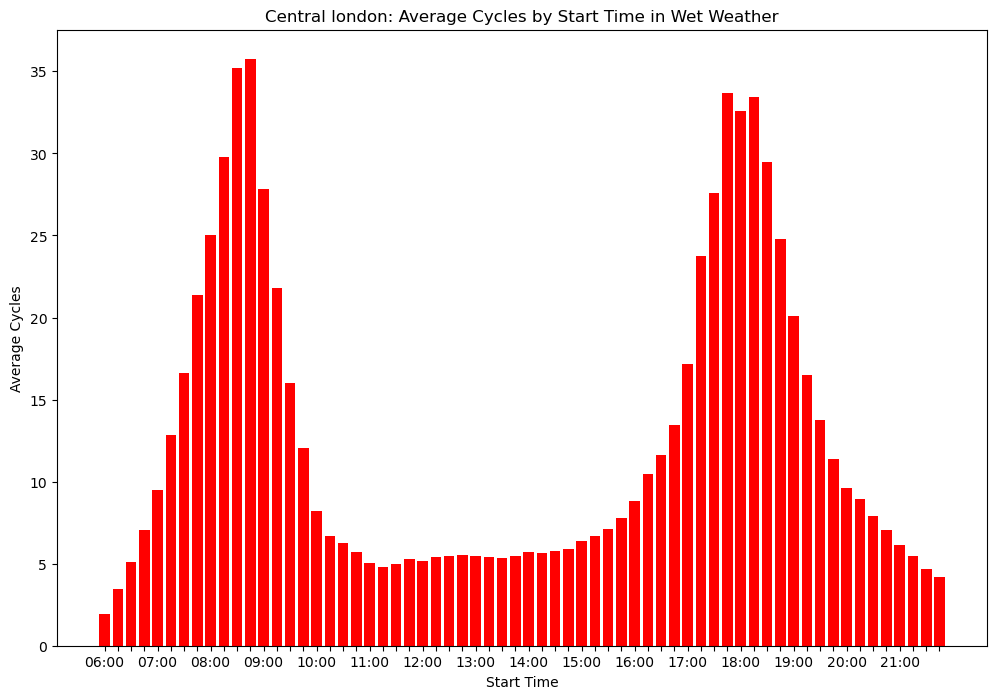

In [651]:
average_cycles_start_time = central_wet_data.groupby('Start time')['Total cycles'].mean().reset_index()

# bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(average_cycles_start_time['Start time'], average_cycles_start_time['Total cycles'], color='red')

# Set x-axis ticks at every 5th label
every_nth = 4
for i, label in enumerate(plt.xticks()[1]):
    if i % every_nth != 0:
        label.set_visible(False)

plt.title('Central london: Average Cycles by Start Time in Wet Weather')
plt.xlabel('Start Time')
plt.ylabel('Average Cycles')
plt.show()

# Inner London Analysis

In [652]:
inner_london.head(1)

,Survey wave (year),Site ID,Location,Survey_weekday,Survey_date,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles,season,Year
0,2015,INNCY001,Grove Road,Wednesday,2015-05-20,Dry,0600 - 0615,Early Morning,Northbound,06:00,1,0,1,spring,2015


In [653]:
inner_dry_data = inner_london[inner_london['Weather'] == 'Dry']
inner_wet_data = inner_london[inner_london['Weather'] == 'Wet']

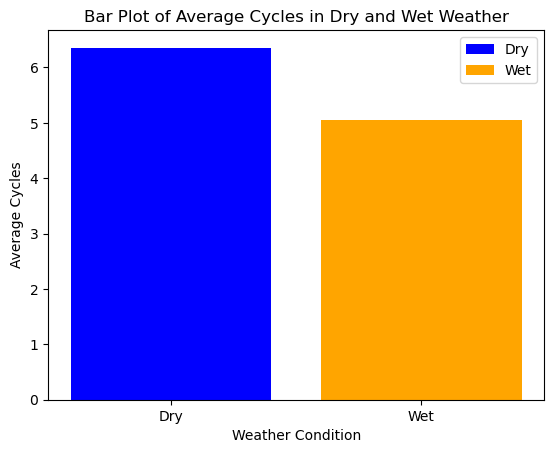

In [654]:
# Plot bar plots
plt.bar('Dry', inner_dry_data['Total cycles'].agg('mean'), color='blue', label='Dry')
plt.bar('Wet', inner_wet_data['Total cycles'].agg('mean'), color='orange', label='Wet')

plt.title('Bar Plot of Average Cycles in Dry and Wet Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Average Cycles')
plt.legend()
plt.show()

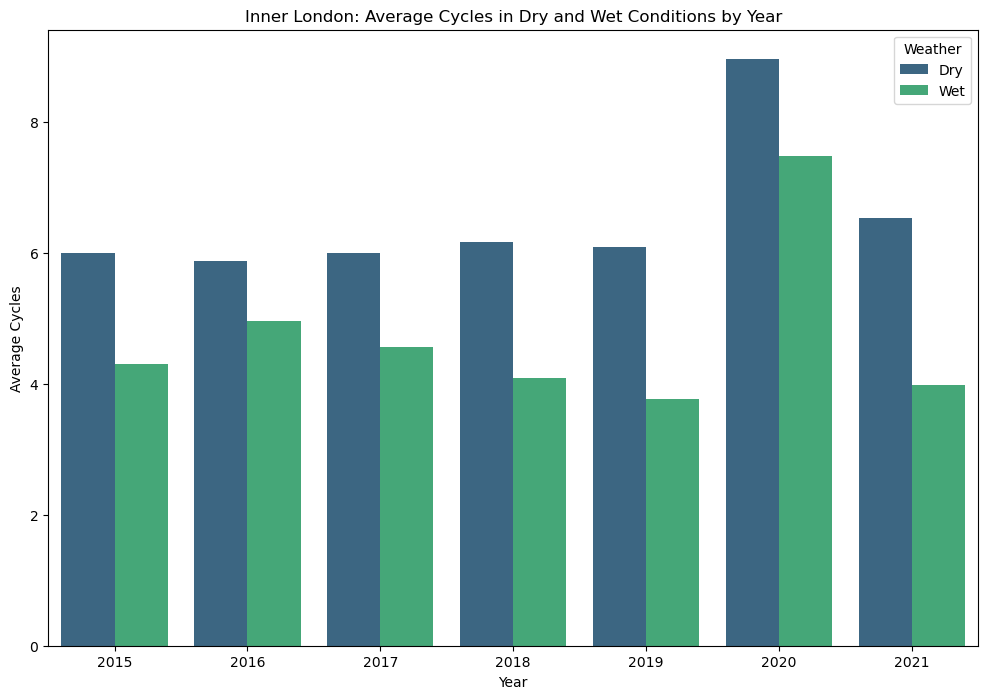

In [655]:
# Calculate the average cycles for each weather condition by year
average_cycles_weather = inner_london.groupby(['Year', 'Weather'])['Total cycles'].mean().reset_index()

# Sort the DataFrame by year and weather condition
average_cycles_weather['Weather'] = pd.Categorical(average_cycles_weather['Weather'], categories=weather_order, ordered=True)
average_cycles_weather = average_cycles_weather.sort_values(['Year', 'Weather'])

# Create a bar chart for average cycles in each weather condition by year
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Total cycles', hue='Weather', data=average_cycles_weather, palette='viridis')
plt.title('Inner London: Average Cycles in Dry and Wet Conditions by Year')
plt.xlabel('Year')
plt.ylabel('Average Cycles')
plt.show()

In [656]:
#Datetie: get month
inner_london['Month'] = inner_london['Survey_date'].dt.month

# change numerical value to associated month using module: calender
inner_london['Month'] = inner_london['Month'].apply(lambda x: calendar.month_name[x])


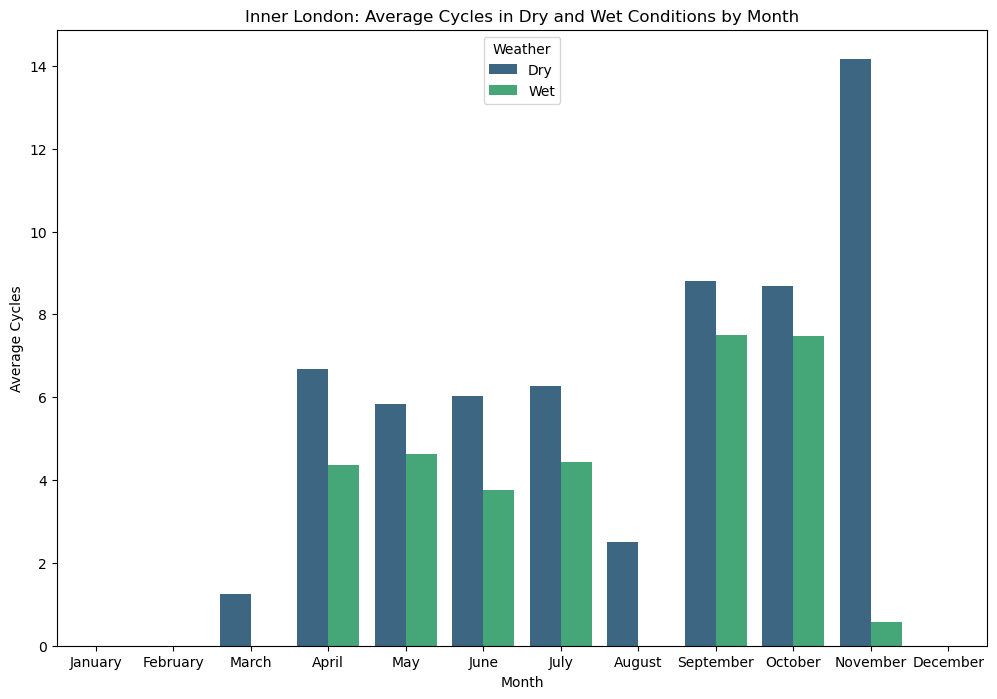

In [657]:
# Calculate the average cycles for each weather condition by year
average_cycles_weather = inner_london.groupby(['Month', 'Weather'])['Total cycles'].mean().reset_index()


month_order = list(calendar.month_name)[1:]  
average_cycles_weather['Month'] = pd.Categorical(average_cycles_weather['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by month and weather condition
weather_order = ['Dry', 'Wet'] 
average_cycles_weather['Weather'] = pd.Categorical(average_cycles_weather['Weather'], categories=weather_order, ordered=True)
average_cycles_weather = average_cycles_weather.sort_values(['Month', 'Weather'])

# Bar chart for average cycles in each weather condition by year
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Total cycles', hue='Weather', data=average_cycles_weather, palette='viridis')
plt.title('Inner London: Average Cycles in Dry and Wet Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Average Cycles')
plt.show()


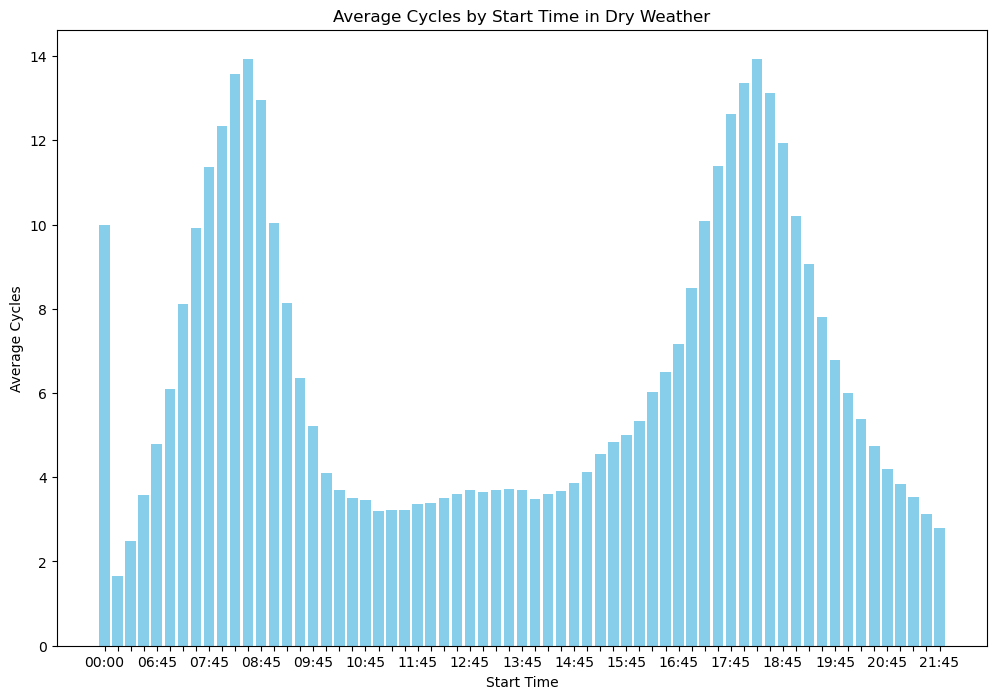

In [658]:
# Calculate the average cycles for each start time
inner_average_cycles_start_time = inner_dry_data.groupby('Start time')['Total cycles'].mean().reset_index()

#plot: bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(inner_average_cycles_start_time['Start time'], inner_average_cycles_start_time['Total cycles'], color='skyblue')

# Set x-axis ticks at every 5th label
every_nth = 4
for i, label in enumerate(plt.xticks()[1]):
    if i % every_nth != 0:
        label.set_visible(False)

#Create plot
plt.title('Average Cycles by Start Time in Dry Weather')
plt.xlabel('Start Time')
plt.ylabel('Average Cycles')
plt.show()

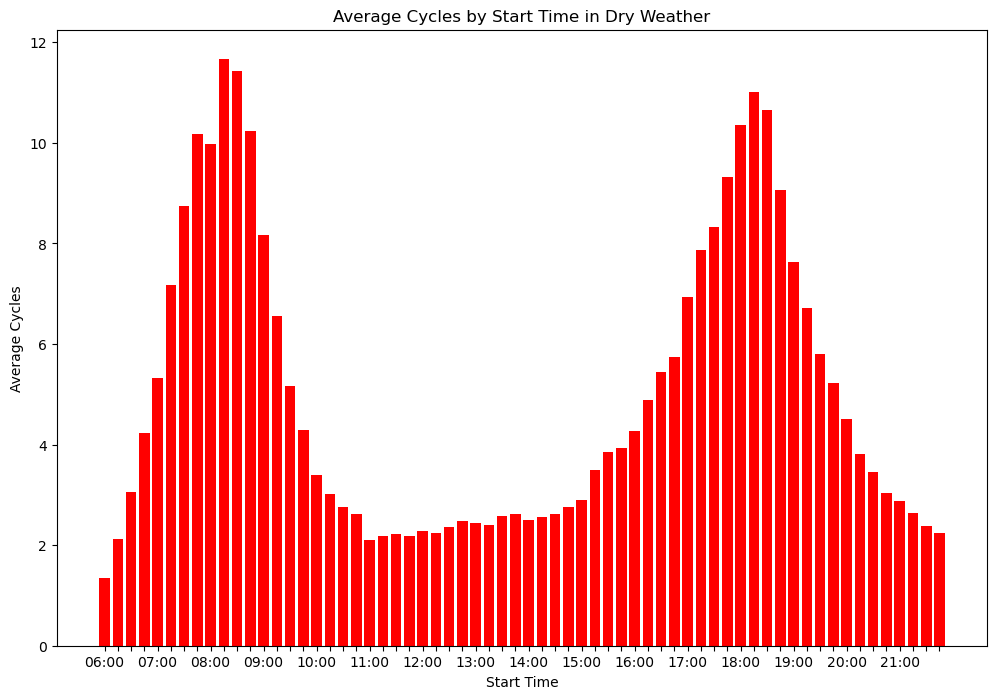

In [659]:
# Calculate the average cycles for each start time
inner_average_cycles_start_time = inner_wet_data.groupby('Start time')['Total cycles'].mean().reset_index()

#plot: bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(inner_average_cycles_start_time['Start time'], inner_average_cycles_start_time['Total cycles'], color='red')

# Set x-axis ticks at every 5th label
every_nth = 4
for i, label in enumerate(plt.xticks()[1]):
    if i % every_nth != 0:
        label.set_visible(False)

#Create plot
plt.title('Average Cycles by Start Time in Dry Weather')
plt.xlabel('Start Time')
plt.ylabel('Average Cycles')
plt.show()

# Outer London Analysis

In [660]:
outer_london.head(1)

,Survey wave (year),Site ID,Location,Weather,Time,Period,Direction,Start time,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,Dry,0600 - 0615,Early Morning,Northbound,06:00,2,1,0,3


In [661]:
outer_london['Weather'].unique()

array(['Dry', 'Wet', 'Sunny', 'unknown', 'Mixed', 'Cold', 'Windy'],
      dtype=object)

In [662]:
outer_london['Weather'] = outer_london['Weather'].replace('Sunny', 'Dry')

In [665]:
outer_data = outer_london.copy()

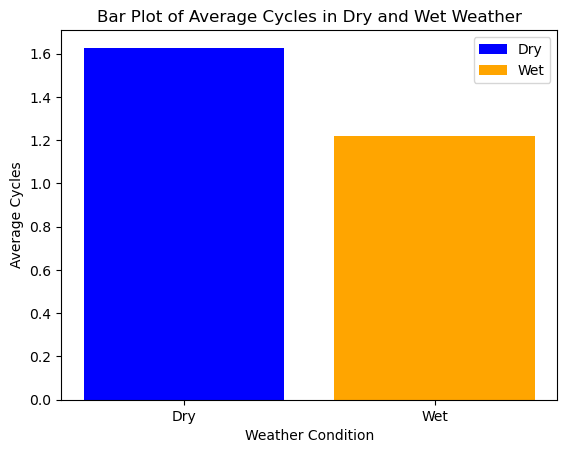

In [668]:
# Plot bar plots
plt.bar('Dry', outer_dry_data['Total cycles'].agg('mean'), color='blue', label='Dry')
plt.bar('Wet', outer_wet_data['Total cycles'].agg('mean'), color='orange', label='Wet')


plt.title('Bar Plot of Average Cycles in Dry and Wet Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Average Cycles')
plt.legend()
plt.show()

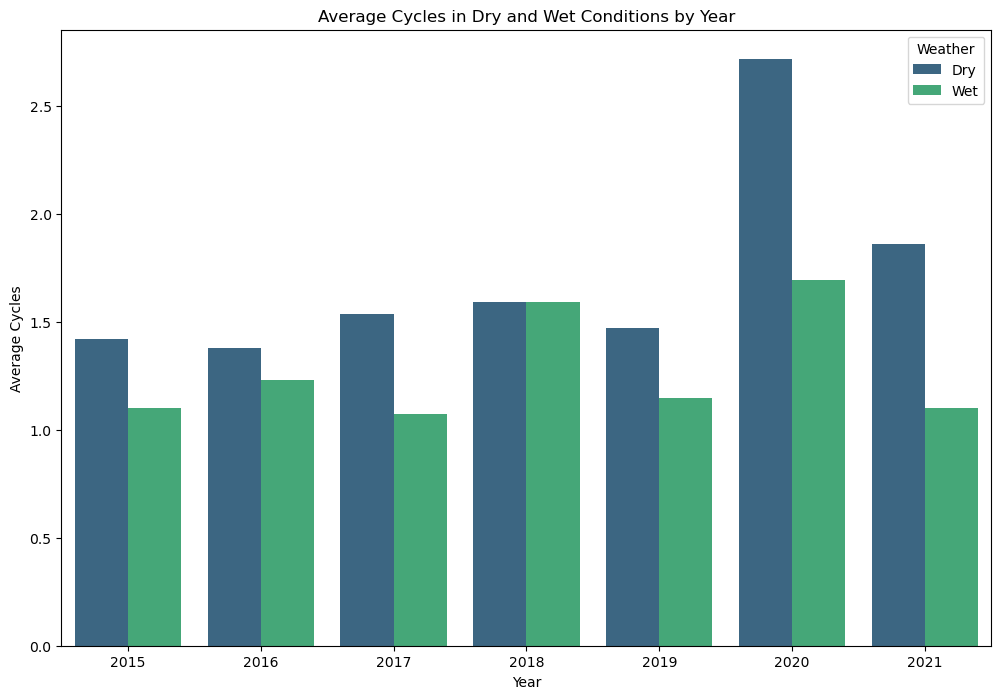

In [669]:
# Calculate the average cycles for each weather condition by year
outer_average_cycles_weather = outer_london.groupby(['Survey wave (year)', 'Weather'])['Total cycles'].mean().reset_index()

# Sort the DataFrame by year and weather condition
weather_order = ['Dry', 'Wet']  
outer_average_cycles_weather['Weather'] = pd.Categorical(outer_average_cycles_weather['Weather'], categories=weather_order, ordered=True)
outer_average_cycles_weather = outer_average_cycles_weather.sort_values(['Survey wave (year)', 'Weather'])

# chart for average cycles in each weather condition by year
plt.figure(figsize=(12, 8))
sns.barplot(x='Survey wave (year)', y='Total cycles', hue='Weather', data=outer_average_cycles_weather, palette='viridis')

plt.title('Average Cycles in Dry and Wet Conditions by Year')
plt.xlabel('Year')
plt.ylabel('Average Cycles')
plt.show()

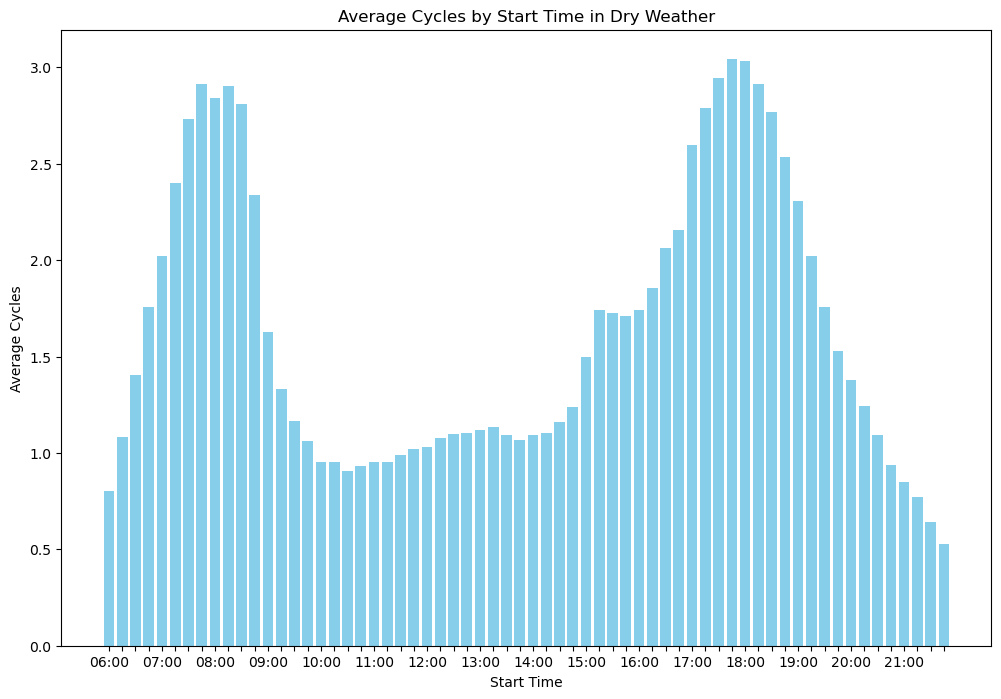

In [670]:
dry_outer_average_cycles_start_time = outer_dry_data.groupby('Start time')['Total cycles'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(dry_outer_average_cycles_start_time['Start time'], dry_outer_average_cycles_start_time['Total cycles'], color='skyblue')

# Set x-axis ticks at every 5th label
every_nth = 4
for i, label in enumerate(plt.xticks()[1]):
    if i % every_nth != 0:
        label.set_visible(False)

plt.title('Average Cycles by Start Time in Dry Weather')
plt.xlabel('Start Time')
plt.ylabel('Average Cycles')
plt.show()

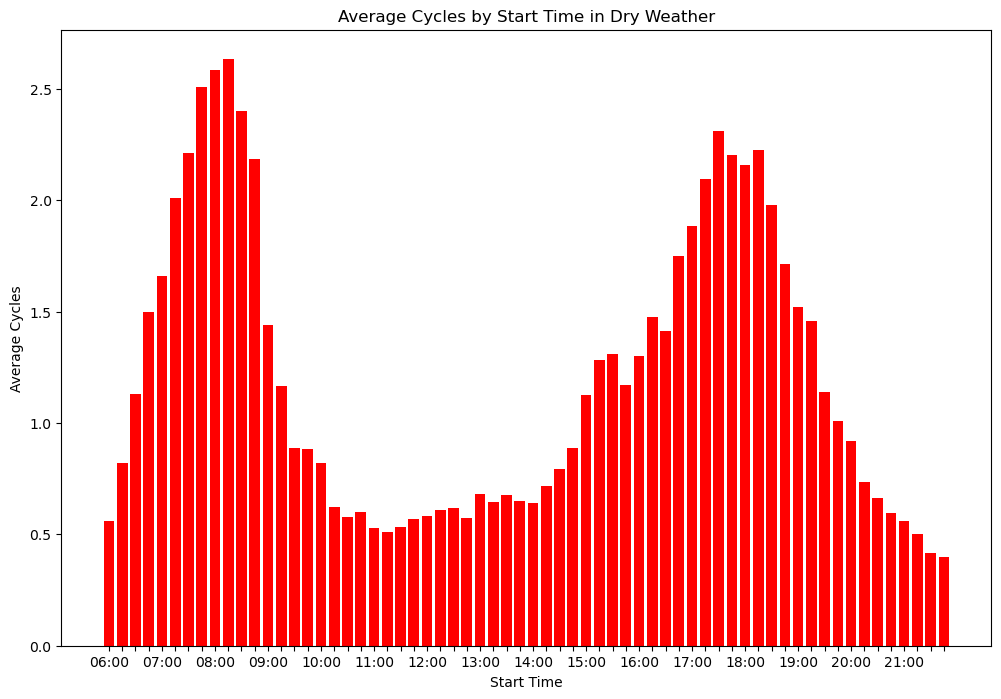

In [674]:
wet_outer_average_cycles_start_time = outer_wet_data.groupby('Start time')['Total cycles'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(wet_outer_average_cycles_start_time['Start time'], wet_outer_average_cycles_start_time['Total cycles'], color='red')

# Set x-axis ticks at every 5th label
every_nth = 4
for i, label in enumerate(plt.xticks()[1]):
    if i % every_nth != 0:
        label.set_visible(False)

plt.title('Average Cycles by Start Time in Dry Weather')
plt.xlabel('Start Time')
plt.ylabel('Average Cycles')
plt.show()